# Make Movie Pipeline

* Loads a single image scan and plots it

In [1]:
import matplotlib
matplotlib.use('Agg')

In [2]:
from pyCHX.chx_libs import np, roi, time, datetime, os,  getpass, db, get_images,LogNorm, plt,ManualMask

from pyCHX.chx_generic_functions import (get_detector, get_fields, get_sid_filenames,load_data, 
                                             RemoveHot, show_img, get_avg_img, reverse_updown,apply_mask)

from pyCHX.movie_maker import save_png_series
 
#%matplotlib notebook

/opt/conda_envs/analysis-2018-1.0/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
from pyCHX.chx_packages import *
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams.update({ 'image.origin': 'lower'   })
plt.rcParams.update({ 'image.interpolation': 'none'   })
import pickle as cpk
#from pyCHX.chx_xpcs_xsvs_jupyter_V1 import *

In [4]:
CYCLE= '2018_1'  #change clycle here
#CYCLE= '2017_2'  #change clycle here
path = '/XF11ID/analysis/%s/masks/'%CYCLE
username =  getpass.getuser()
#username =  'rmhanna'
#username = 'sanat'
#data_dir0  = create_user_folder(CYCLE, username)
data_dir0  = '/home/yuzhang/Analysis/JanusXPCS/Results/'

print( data_dir0 )

/home/yuzhang/Analysis/JanusXPCS/Results/


In [5]:
#from chxtools.handlers import LazyEigerHandler
#db.fs.register_handler('AD_EIGER', LazyEigerHandler)

In [62]:
uid = '1745a0' ##Fri Feb 23 03:18:29 2018 #14006: XPCS, 1000 frames, 0.00134 sec, att2= 1, sample=SiO2Pt_250_TH2O21:1--  1745a031-4a51-454c-a84f-e4d4767ddf6a
#uid = '2b5b78' ##Fri Feb 23 02:51:53 2018 #14001: XPCS, 1000 frames, 0.00134 sec, att2= 1, sample=SiO2Pt_250_TW1:1--  2b5b7816-f874-496e-a2e4-7dd5517713e6 
uid = '97f495' ##Fri Feb 23 04:33:39 2018 #14026: XPCS, 1000 frames, 0.00134 sec, att2= 1, sample=SiO2Pt_250_T50%H2O2_0.35%--  97f495c8-55ed-4357-9215-0baae1cdaee5 


#uid = 'b6e828' ##Fri Feb 23 04:06:40 2018 #14017: XPCS, 1000 frames, 0.00134 sec, att2= 1, sample=SiO2Pt_250_T50%H2O21.75%--  b6e8288a-08b8-46f8-a087-df022a96b2cf
#uid = '752b50' ##Fri Feb 23 03:55:53 2018 #14014: XPCS, 1000 frames, 0.00134 sec, att2= 1, sample=SiO2Pt_250_T50%H2O21.75%--  752b503c-1454-4307-9b23-35a1e561019e

#id = '2a4954' ##Fri Feb 23 03:59:57 2018 #14015: XPCS, 1000 frames, 0.00134 sec, att2= 1, sample=SiO2Pt_250_T50%H2O21.75%--  2a49545e-cd74-473d-9487-b487800f5b14 


In [63]:
sud = get_sid_filenames(db[uid])
print ('scan_id, full-uid, data path are:  %s--%s--%s'%(sud[0], sud[1], sud[2][0] ))
#start_time, stop_time = '2017-2-24  12:23:00', '2017-2-24  13:42:00' 
#sids, uids, fuids  = find_uids(start_time, stop_time)

filepath : /XF11ID/data/2018/02/23/c72c6893-1aa0-4ee7-a96f
got images_per_file
scan_id, full-uid, data path are:  14026--97f495c8-55ed-4357-9215-0baae1cdaee5--/XF11ID/data/2018/02/23/c72c6893-1aa0-4ee7-a96f_264_master.h5


In [64]:
data_dir = os.path.join(data_dir0, '%s/'%(sud[1]))
os.makedirs(data_dir, exist_ok=True)
print('Results from this analysis will be stashed in the directory %s' % data_dir)
uidstr = 'uid=%s'%uid

Results from this analysis will be stashed in the directory /home/yuzhang/Analysis/JanusXPCS/Results/97f495c8-55ed-4357-9215-0baae1cdaee5/


In [65]:
detectors = get_detectors(db[uid])
print('The detectors are:%s'%detectors)
md = get_meta_data( uid )

The detectors are:['eiger4m_single_image']


In [66]:
imgs = load_data( uid, md['detector'], reverse= True  )
md.update( imgs.md );Nimg = len(imgs);
#if 'number of images'  not in list(md.keys()):
md['number of images']  = Nimg
pixel_mask =  1- np.int_( np.array( imgs.md['pixel_mask'], dtype= bool)  )
print( 'The data are: %s' %imgs )

md['acquire period' ] = md['cam_acquire_period']
md['exposure time'] =  md['cam_acquire_time']

The data are: Pipeline processed through proc_func. Original repr:
    EigerImages processed through proc_func. Original repr:
        <Frames>
        Length: 1000 frames
        Frame Shape: 2167 x 2070
        Pixel Datatype: uint16


In [67]:
imgsa = apply_mask( imgs, pixel_mask )

In [68]:
imgsa

Pipeline processed through proc_func. Original repr:
    Pipeline processed through proc_func. Original repr:
        EigerImages processed through proc_func. Original repr:
            <Frames>
            Length: 1000 frames
            Frame Shape: 2167 x 2070
            Pixel Datatype: uint16

In [69]:
#imgsr = reverse_updown( imgs )

In [70]:
#%matplotlib notebook

In [71]:
 %run /home/yuzhang/pyCHX_link/pyCHX/chx_generic_functions.py

In [72]:
center = [801, 926]
w = 280
cx,cy = center
# [  cx-w:cx+w, cy-w:cy+w ]

In [73]:
#show_img(  imgsa[10][  cx-w:cx+w, cy-w:cy+w ] , vmin=1e-1, vmax=2, cmap=cmap_hdr_albula, logs=True, center=center[::-1], image_name ='uid=%s'%uid )
#show_img(  imgsa[10][  cx-w:cx+w, cy-w:cy+w ] , vmin=1e-1, vmax=2,  logs=True, center=center[::-1], image_name ='uid=%s'%uid )



In [74]:
#%matplotlib notebook

In [75]:
#imgsa[0]

<IPython.core.display.Javascript object>


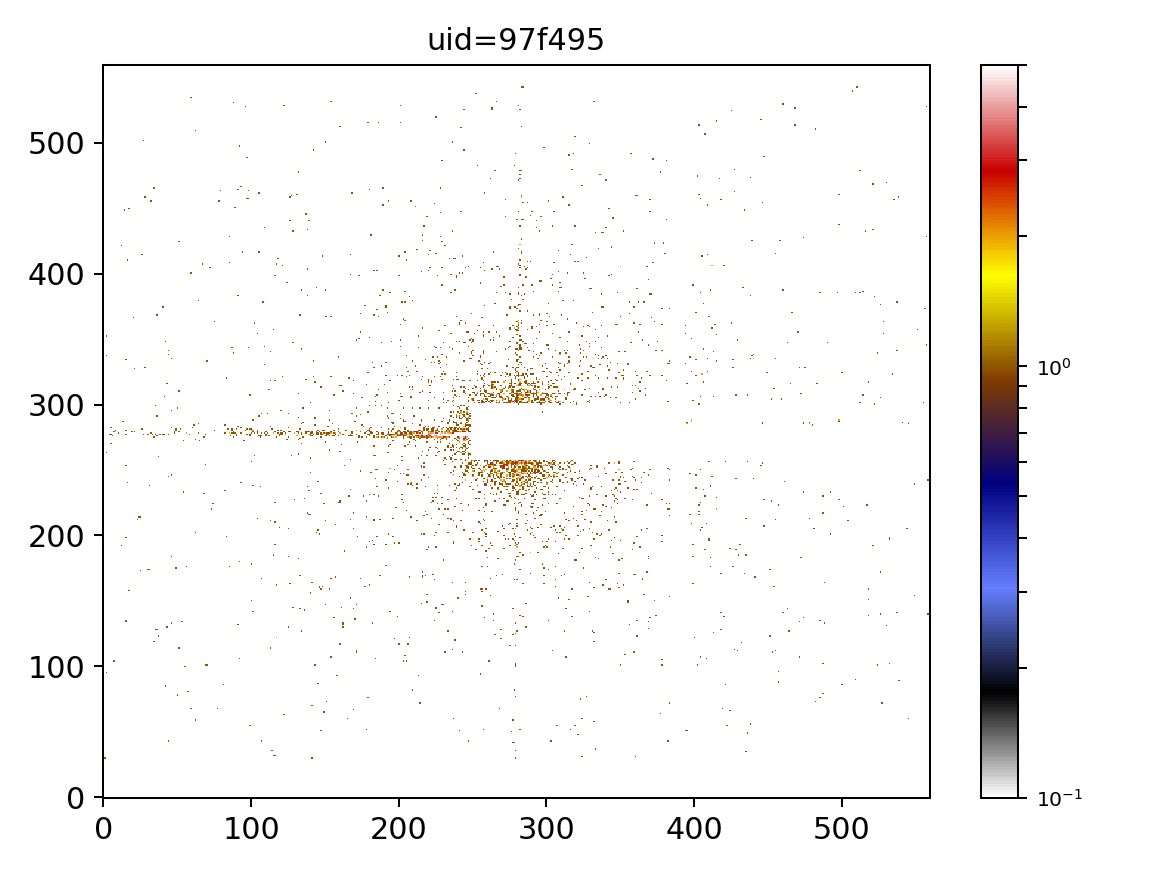

/opt/conda_envs/analysis-2018-1.0/lib/python3.6/site-packages/matplotlib/colorbar.py:821: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  y[self._inside] = norm(yi)


In [76]:

show_img(  imgsa[10][  cx-w:cx+w, cy-w:cy+w ] , vmin=.1, vmax=5, cmap=cmap_hdr_goldish, logs=True, center=center[::-1], image_name ='uid=%s'%uid )

In [41]:
#%run /XF11ID/analysis/Analysis_Pipelines/Develop/chxanalys/chxanalys/movie_maker.py

In [62]:
data_dir

'/home/yuzhang/Analysis/JanusXPCS/Results/752b503c-1454-4307-9b23-35a1e561019e/'

In [63]:
uid

'752b50'

In [64]:
 %run /home/yuzhang/pyCHX_link/pyCHX/movie_maker.py

In [65]:
len(imgsa)

1000

In [66]:
num_frames= 1000
fps = 10
interval = 30
#ROI=[  50, 1000, 643, 743]
cy,cx = center
w = 280
ROI=[  cx-w,cx+w, cy-w, cy+w ]

########Currently, this code is not work, due to a 'mencoder' error
#if False:
if True:    
    movie_maker(imgsa, num_frames=num_frames, outDir= data_dir, real_interval=1.340, 
                vmin=1e-1, vmax=2, cmap=cmap_hdr_albula, logs=True,
            ROI=ROI, interval=interval, fps=fps, show_text_on_image = True,
        movie_name= 'uid_%s--%s-frames_fps-%s.mp4'%(uid,num_frames,fps)  )    
    
#####Try to save as png files


In [67]:
#movie_maker??

In [68]:
##save a imgages sereies, if use imgs[:50] save the first 50 frames, if use img save all frames
if False:
    save_png_series( imgs[:50], ROI= [50, 1000, 340,440], 
            outDir= data_dir, uid=uid, vmin= .1, vmax= 10, logs=True,cmap='viridis',dpi=100)

In [69]:
#if False:
plt.close('all')  #to clear memory